In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
from sklearn.metrics import mean_squared_error

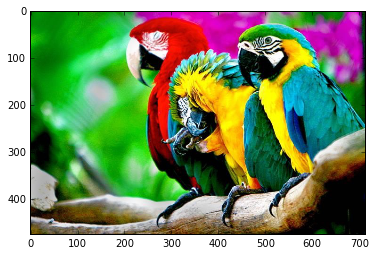

In [2]:
image = img_as_float(imread('parrots.jpg'))
plt.imshow(image)

In [32]:
def psnr(source, target):    
    mse = np.mean((source - target) ** 2)
    return 10 * np.log10(np.max(source) ** 2 / mse)    

def do_segmentation(kmeans, source, alg=np.mean):
    width, height, channels = image.shape    
    flatten = source.reshape((width * height, channels))
    predicted = kmeans.predict(flatten)
    colors = np.empty((kmeans.n_clusters, channels), dtype=np.float)
    for i in range(kmeans.n_clusters):
        colors[i] = alg(flatten[predicted == i], axis=0)
    segmented = np.empty(flatten.shape)
    for i in range(len(segmented)):
        segmented[i] = colors[predicted[i]]
    return segmented.reshape(image.shape)

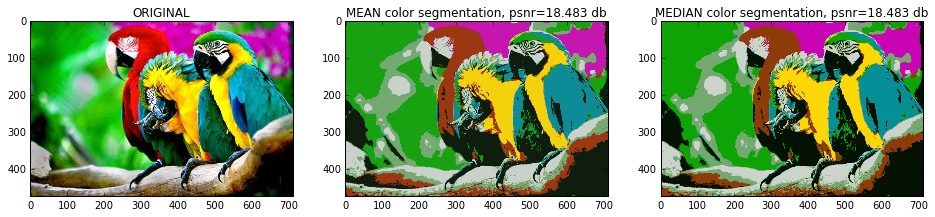

In [33]:
kmeans = KMeans(init='k-means++', random_state=241)
kmeans.fit(image.reshape(image.shape[0] * image.shape[1], image.shape[2]))

mean_segmented = do_segmentation(kmeans, image, np.mean)
median_segmented = do_segmentation(kmeans, image, np.median)
    
fig = plt.figure(figsize=(16, 8))


fig.add_subplot(1,3,1, title='ORIGINAL')
plt.imshow(image)

fig.add_subplot(1,3,2, title='MEAN color segmentation, psnr=%.3f db' % psnr(image, mean_segmented))
plt.imshow(mean_segmented)

fa = fig.add_subplot(1,3,3, title='MEDIAN color segmentation, psnr=%.3f db' % psnr(image, mean_segmented))
plt.imshow(median_segmented)

In [34]:
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=241)
    kmeans.fit(image.reshape(image.shape[0] * image.shape[1], image.shape[2]))
    segmented_mean = do_segmentation(kmeans, image, np.mean)
    psnr_mean = psnr(image, segmented_mean)    
    
    segmented_median = do_segmentation(kmeans, image, np.median)
    psnr_median = psnr(image, segmented_median)
    
    max_psnr = np.max([psnr_mean, psnr_median])
    print('n_clusters=%d psnr=%.3f (mean=%.3f, median=%.3f)' % (k, max_psnr, psnr_mean, psnr_median))
    if max_psnr > 20.0:
        with open('answer.txt', 'w') as file:
            file.write('%d' % k)
        break

n_clusters=1 psnr=9.866 (mean=9.866, median=9.497)
n_clusters=2 psnr=12.143 (mean=12.143, median=11.733)
n_clusters=3 psnr=13.204 (mean=13.204, median=12.682)
n_clusters=4 psnr=14.413 (mean=14.413, median=14.062)
n_clusters=5 psnr=15.584 (mean=15.584, median=15.247)
n_clusters=6 psnr=16.601 (mean=16.601, median=16.118)
n_clusters=7 psnr=17.695 (mean=17.695, median=17.409)
n_clusters=8 psnr=18.483 (mean=18.483, median=18.186)
n_clusters=9 psnr=19.163 (mean=19.163, median=18.866)
n_clusters=10 psnr=19.692 (mean=19.692, median=19.467)
n_clusters=11 psnr=20.179 (mean=20.179, median=19.906)
